In [85]:
campaign = "xho"

In [86]:
import pandas as pd
from sessionstats import get_folder_data
import copy
import numpy as np

session_data = get_folder_data(f"../_{campaign}/sessions")

In [87]:
base_df = pd.DataFrame(session_data, columns=["number", "title", "date", "levelup", "new", "players"])
base_df.set_index("number", inplace=True)
base_df.tail()

,title,date,levelup,new,players
number,,,,,
26,"Hec'mal, fedele di Vecna",2023-03-25,13.0,NaN,"[{'name': 'Xandra', 'player': 'Fede', 'guest':..."
27,In fondo al fiume,2023-04-01,NaN,NaN,"[{'name': 'Xandra', 'player': 'Fede', 'guest':..."
28,Discussioni e ritrovamenti,2023-04-07,NaN,NaN,"[{'name': 'Xandra', 'player': 'Fede', 'guest':..."
29,Volo sull'oceano,2023-04-15,NaN,NaN,"[{'name': 'Nikolaya', 'player': 'Fede', 'guest..."
30,La Fiera del Domani,2023-04-29,NaN,true,"[{'name': 'Nikolaya', 'player': 'Fede', 'guest..."


In [88]:
simplified_data = copy.deepcopy(session_data)

cols = ["number", "title", "date", "levelup", "new"]

for data in simplified_data:
    for player in data["players"]:
        data[player["player"]] = player["name"]
        if player['player'] not in cols:
            cols.append(player['player'])
    del data["players"]

df = pd.DataFrame(simplified_data, columns=cols).set_index("number")
df['levelup'] = df['levelup'].astype('Int8')
df.tail()

,title,date,levelup,new,Fede,Camilla,Jack,Gimmy,Matte,Salo,Chiara,Red,Delu
number,,,,,,,,,,,,,
26,"Hec'mal, fedele di Vecna",2023-03-25,13,NaN,Xandra,Estia,NaN,Kaizner,NaN,Rath,NaN,Krieg,Raknar
27,In fondo al fiume,2023-04-01,<NA>,NaN,Xandra,Estia,Kir,NaN,NaN,Rath,NaN,NaN,NaN
28,Discussioni e ritrovamenti,2023-04-07,<NA>,NaN,Xandra,NaN,NaN,Kaizner,NaN,Rath,Kor,Krieg,Raknar
29,Volo sull'oceano,2023-04-15,<NA>,NaN,Nikolaya,NaN,NaN,NaN,NaN,Rath,Kor,Krieg,Raknar
30,La Fiera del Domani,2023-04-29,<NA>,true,Nikolaya,Estia,Kir,Kaizner,NaN,Rath,NaN,NaN,Raknar


In [89]:
import matplotlib
from matplotlib import pyplot as plt
from matplotlib import colors
import numpy as np
import random

In [90]:
plt.style.use('dark_background')

[0, 4.0, 9.0, 10, 14.0, 15, 19.0, 24.0, 25, 29, 29.0]


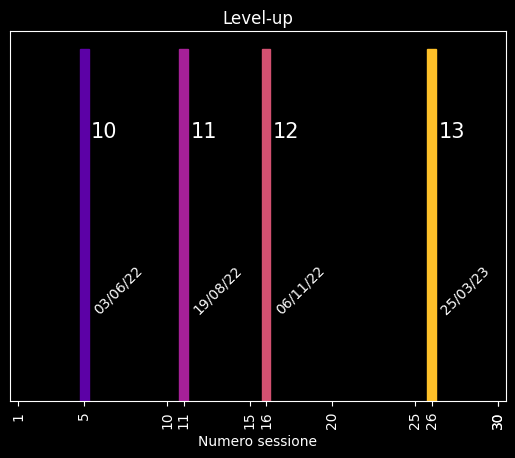

In [112]:
cmap = 'plasma'
ax = df['levelup'].notnull().replace({True: 1, False: 0}).plot.bar()

ax.set_xlabel("Numero sessione")
ax.set_title("Level-up")
ax.set_yticklabels([])
xticks = [0, df.index.max() - 1]
for i in np.arange(df.index.min() - 2, df.index.max()+1, 5.0):
    if i > 0:
        xticks.append(i)
for i, data in enumerate(session_data):
    if 'levelup' in data and not i in xticks:
        xticks.append(i)
xticks.sort()
plt.xticks(xticks)
ax.tick_params(axis='y', length=0)

cmap = plt.get_cmap(cmap)

for i, p in enumerate(ax.patches):
    ses_num = i + 1
    if p.get_height() > 0:
        val = df.loc[ses_num, 'levelup']
        val_str = str(val)
        date = df.loc[ses_num, 'date']
        date_str = date.strftime("%d/%m/%y")
        ax.annotate(val_str, (p.get_x() + p.get_width() + 0.15, p.get_height() * 0.75), ha='left', size=15)
        ax.annotate(date_str, (p.get_x() + p.get_width() + 0.15, p.get_height() * 0.25), rotation=45, ha='left')
        p.set(color=cmap(ses_num / df.index.max()))
    

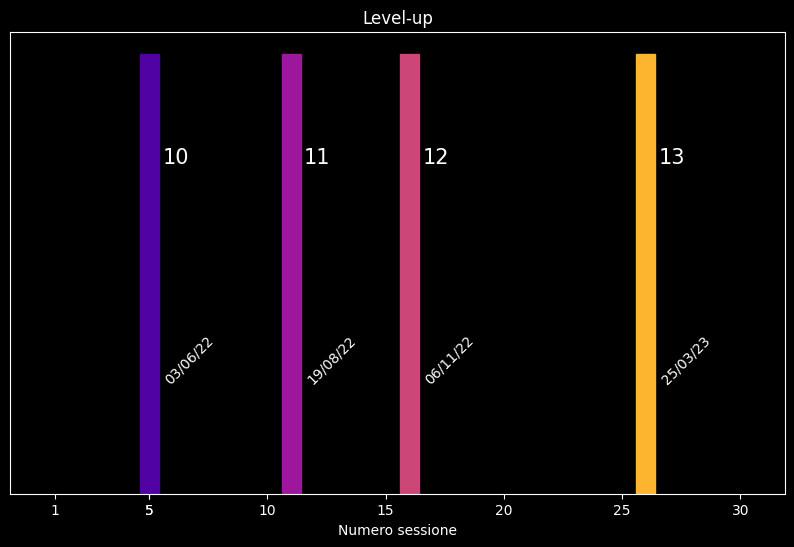

In [123]:
cmap = 'plasma'
figsize=(10, 6)

numbers = [x['number'] for x in session_data]
plot_y = [1 if 'levelup' in x else 0 for x in session_data]
fig, ax = plt.subplots(figsize=figsize)
plt.bar(numbers, plot_y)

ax.set_xlabel("Numero sessione")
ax.set_title("Level-up")
ax.set_yticklabels([])
xticks = [1, max(numbers)]
for i in np.arange(5, max(numbers), 5.0):
    xticks.append(i)
for i, data in enumerate(session_data):
    if 'levelup' in data and not i in xticks:
        xticks.append(data['number'])
xticks.sort()
plt.xticks(xticks)
ax.tick_params(axis='y', length=0)

cmap_obj = plt.get_cmap(cmap)

for i, p in enumerate(ax.patches):
    ses_num = i
    if p.get_height() > 0:
        val = session_data[ses_num]['levelup']
        val_str = str(val)
        date = session_data[ses_num]['date']
        date_str = date.strftime("%d/%m/%y")
        ax.annotate(val_str, (p.get_x() + p.get_width() + 0.15, p.get_height() * 0.75), ha='left', size=15)
        ax.annotate(date_str, (p.get_x() + p.get_width() + 0.15, p.get_height() * 0.25), rotation=45, ha='left')
        p.set(color=cmap_obj(ses_num / numbers[-1]))
    